In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import importlib

import interpolation_runner as ip
import file_handler as fh

In [2]:
#--SETUP: ---------------------------------------------------------------------------------
epsilons = np.linspace(-500, 500, 10)
lamdas = np.linspace(0,1,12)
T_L = 4
T_R = 1

if T_L > T_R:
    T_COLD = T_R
    T_HOT = T_L

INPUT = {
    'omega': 0.1,
    'u_intra': 200,
    'u_inter': 100,
    'V_B': 90,
    'gammaL': 0.1,
    'gammaR': 0.1,
    'T_L': T_L,
    'T_R': T_R,
}

In [3]:

I, I_var, J_QH, P, eff, sigma, TUR = ip.run_interpolation(epsilons, lamdas, **INPUT)

In [ ]:
importlib.reload(fh)
fh.save_file(I, I_var, J_QH, P, eff, sigma, TUR, epsilons, lamdas, INPUT)


"\n# Flatten the arrays\nEpsilon, Lamda = np.meshgrid(epsilons, lamdas)    # Create a 2D grid\narrays = [Epsilon, Lamda, I, I_var, J_QH, P, eff, sigma, TUR]\nflattened_data = [array.flatten() for array in arrays]\n\n# Create a DataFrame for the results\ndf_results = pd.DataFrame(np.column_stack(flattened_data), columns=['epsilon', 'lambda', 'I', 'I_var', 'J_QH', 'P', 'eff', 'sigma', 'TUR'])\n\n# Add the parameters as new columns (this will be the same for all rows)\nfor param, value in INPUT.items():\n    df_results[param] = value\n\n# Save to CSV\ndf_results.to_csv('results.csv', index=False)\n\n# Print the DataFrame to check the structure\nprint(df_results.head())\n"

In [18]:

# Read the CSV file into a DataFrame
df = pd.read_csv('results.csv')

# Find the minimum TUR value
min_tur_value = df['TUR'].min()

# Filter the DataFrame for all rows with the lowest TUR value
min_tur_rows = df[df['TUR'] == min_tur_value]

print(min_tur_rows)

      epsilon  lambda             I         I_var          J_QH             P  \
6  166.666667     0.0  3.537695e-26  3.537695e-26  7.503500e-24  3.183925e-24   

        eff         sigma       TUR  omega  u_intra  u_inter  V_B  gammaL  \
6  0.424325  2.443700e-24  69.07605    0.1      200      100   90     0.1   

   gammaR  T_L  T_R  
6     0.1    4    1  


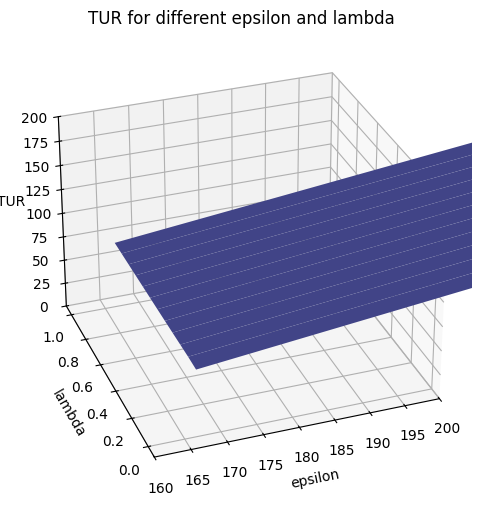

In [6]:
#3D - plot

Epsilon, Lamda = np.meshgrid(epsilons, lamdas)    # Create a 2D grid

# Plot the surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Epsilon, Lamda, TUR, cmap='viridis')

# Labels
ax.set_xlabel('epsilon')
ax.set_ylabel('lambda')
ax.set_zlabel('TUR')
ax.set_title('TUR for different epsilon and lambda')
ax.set_xlim(160, 200)
ax.set_zlim(0, 200)
#ax.view_init(elev=-90, azim=120)
ax.view_init(azim=-110)

plt.show()

# Create interactive 3D surface plot
fig = go.Figure(data=[go.Surface(z=TUR, x=Epsilon, y=Lamda, colorscale="viridis")])

# Labels
fig.update_layout(
    title="TUR for different epsilon and lambda",
    scene=dict(
        #xaxis_title="epsilon",
        #yaxis_title="lambda",
        #zaxis_title="TUR"
        xaxis=dict(title="epsilon", range=[160, 200]),  # X-axis limits
        yaxis=dict(title="lambda", range=[0, 1]),  # Y-axis limits
        zaxis=dict(title="T", range=[0, 200])  # Z-axis remains auto-scaled
    )
)

# Show the interactive plot
fig.show()



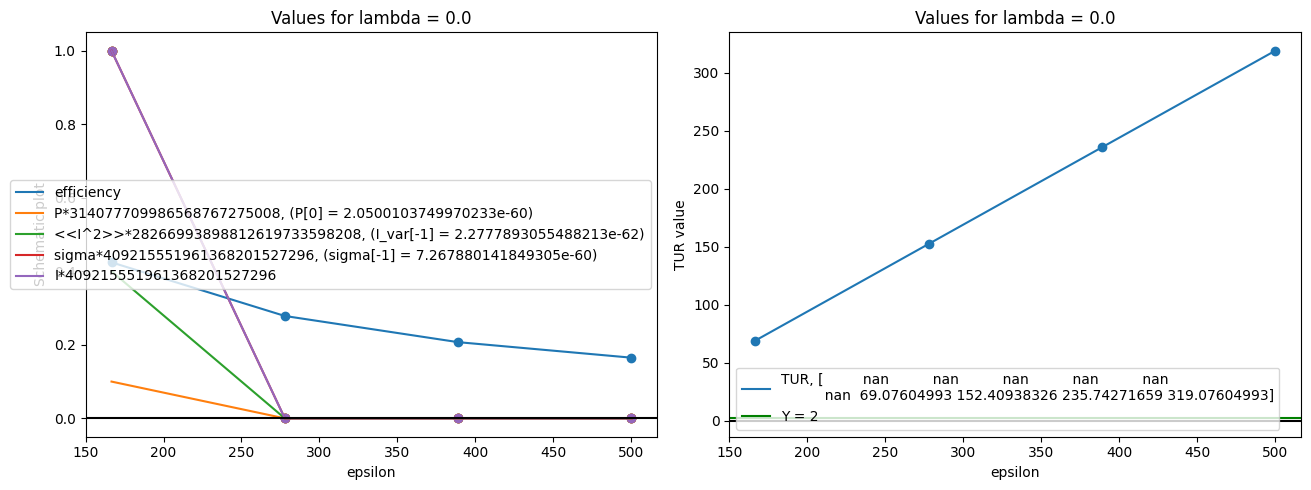

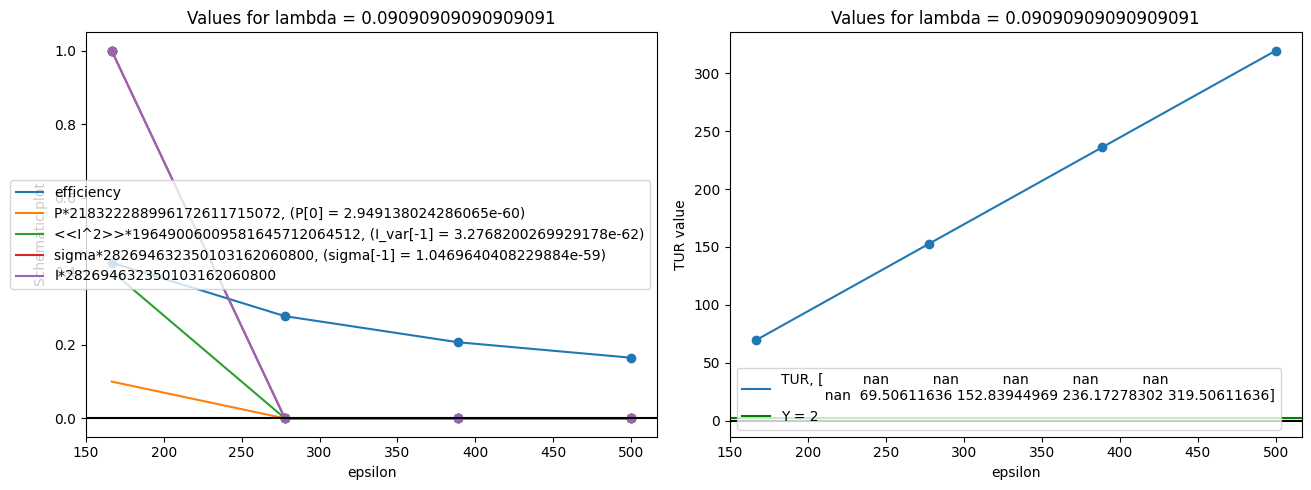

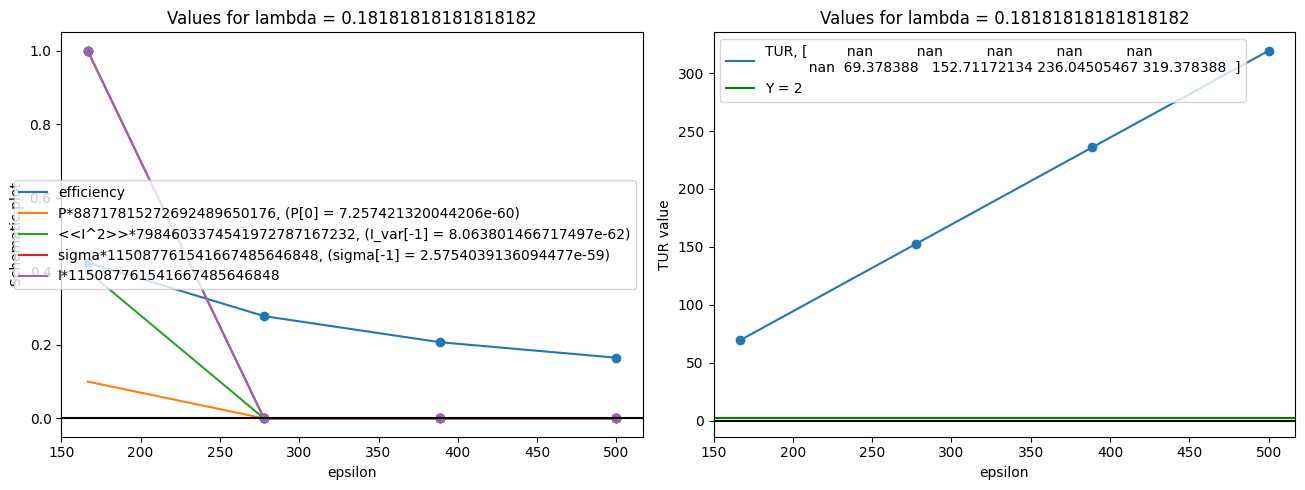

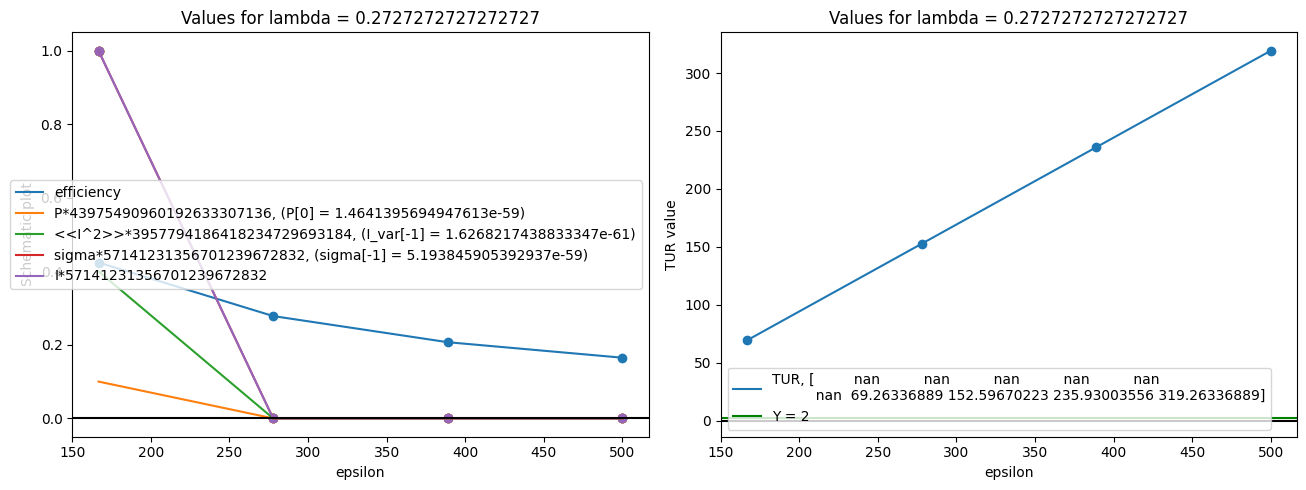

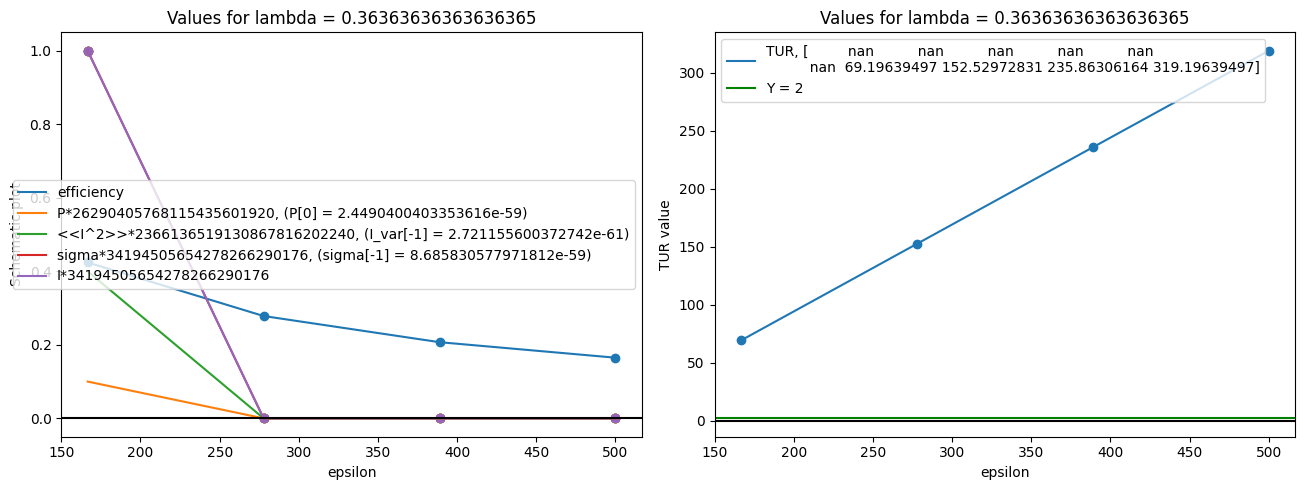

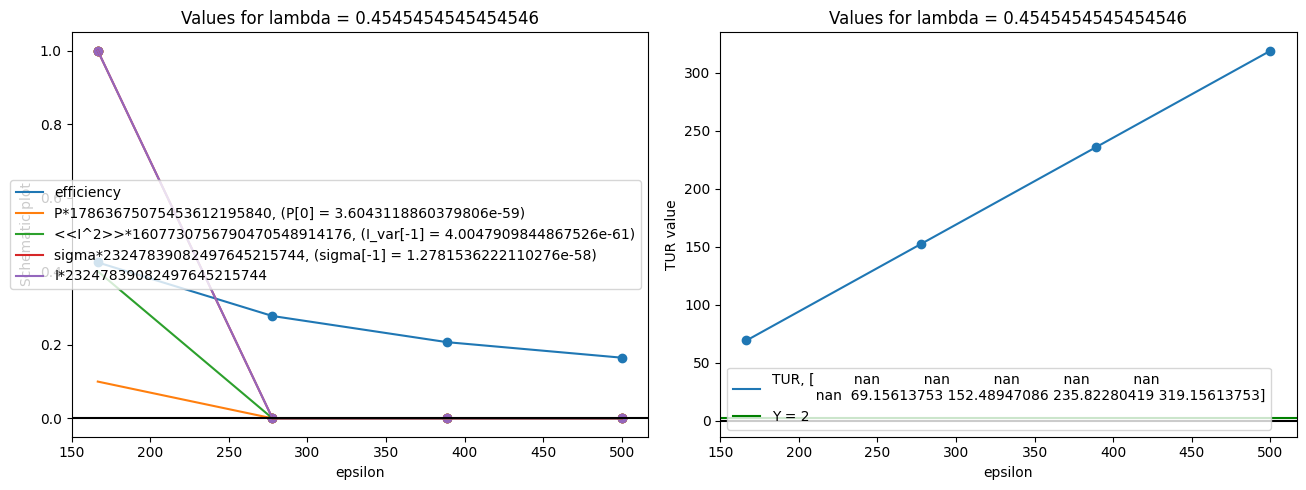

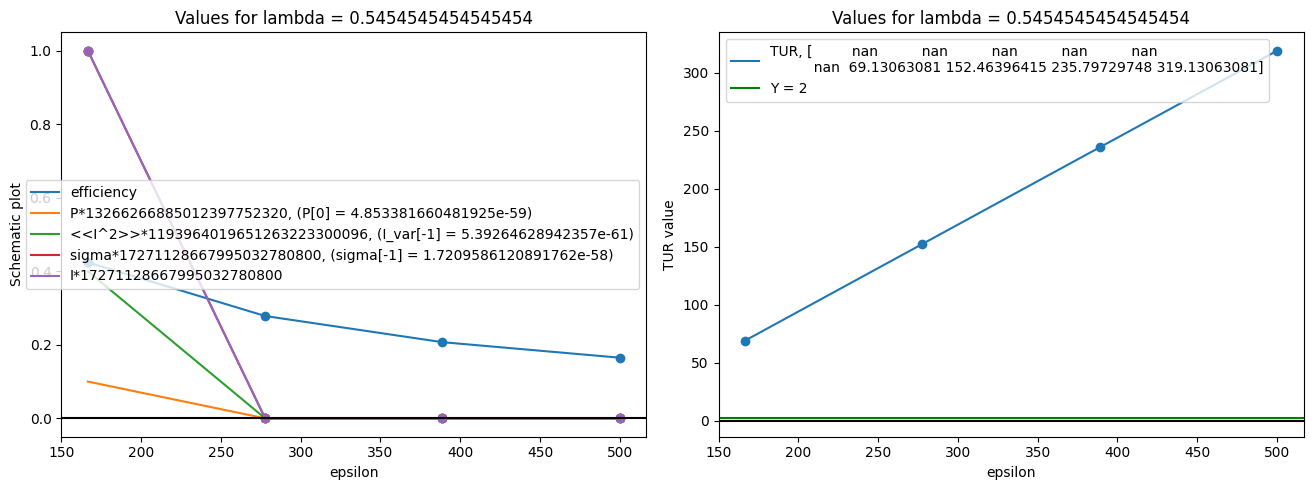

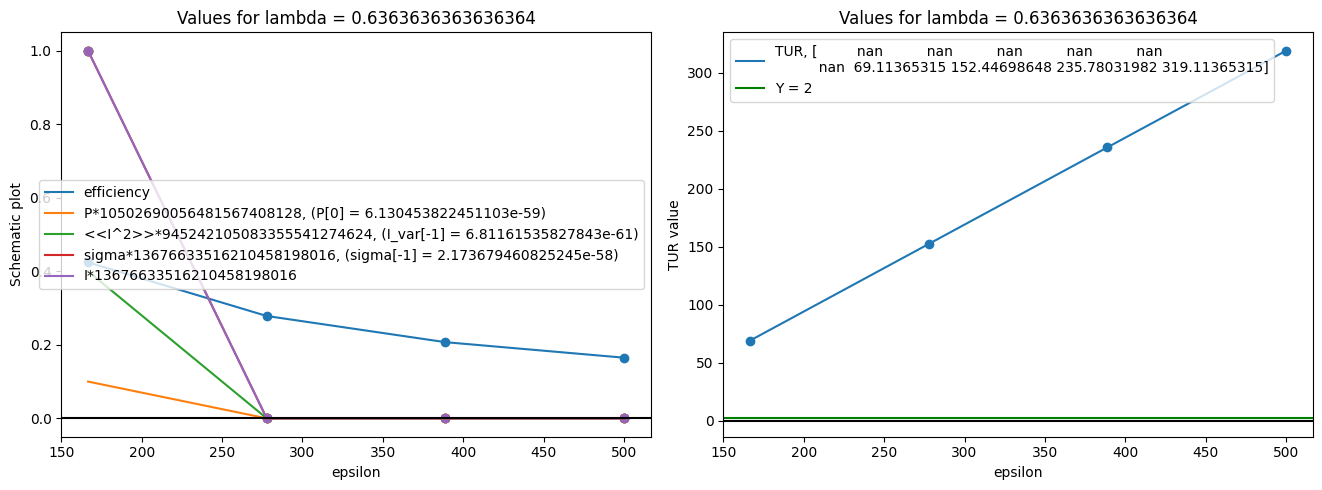

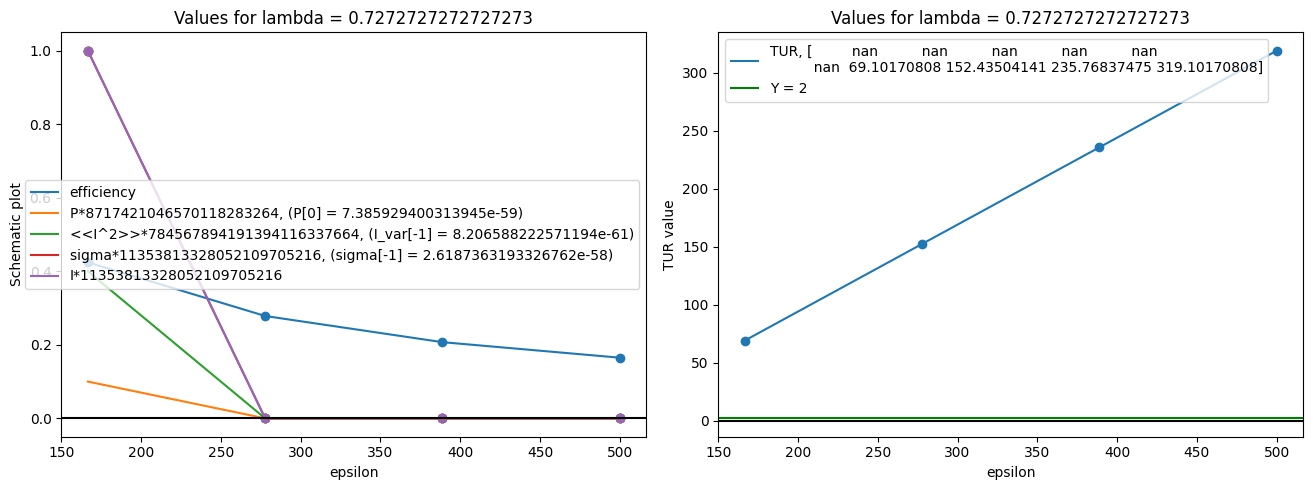

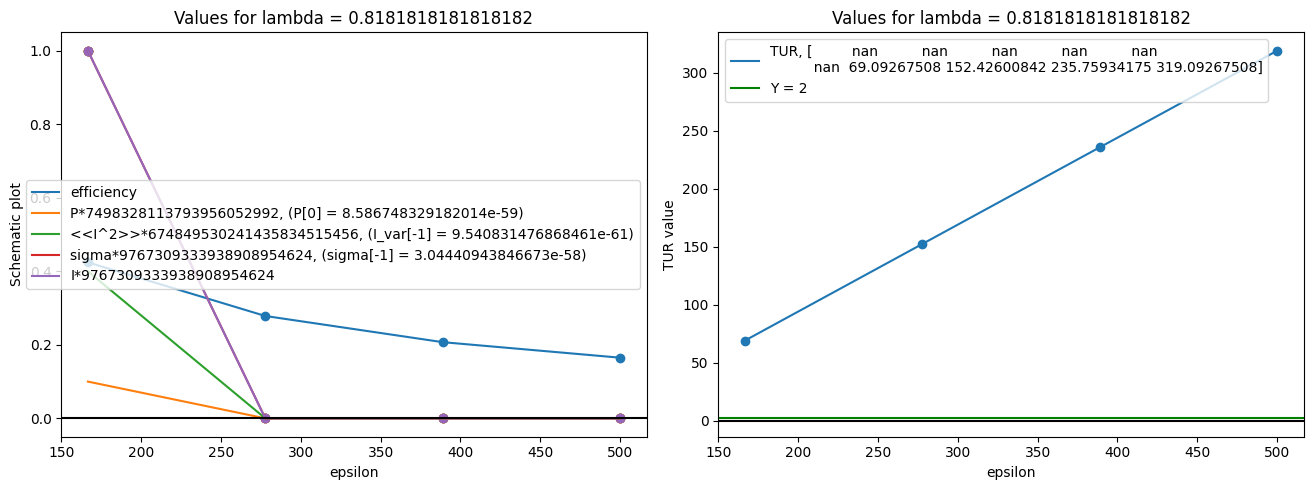

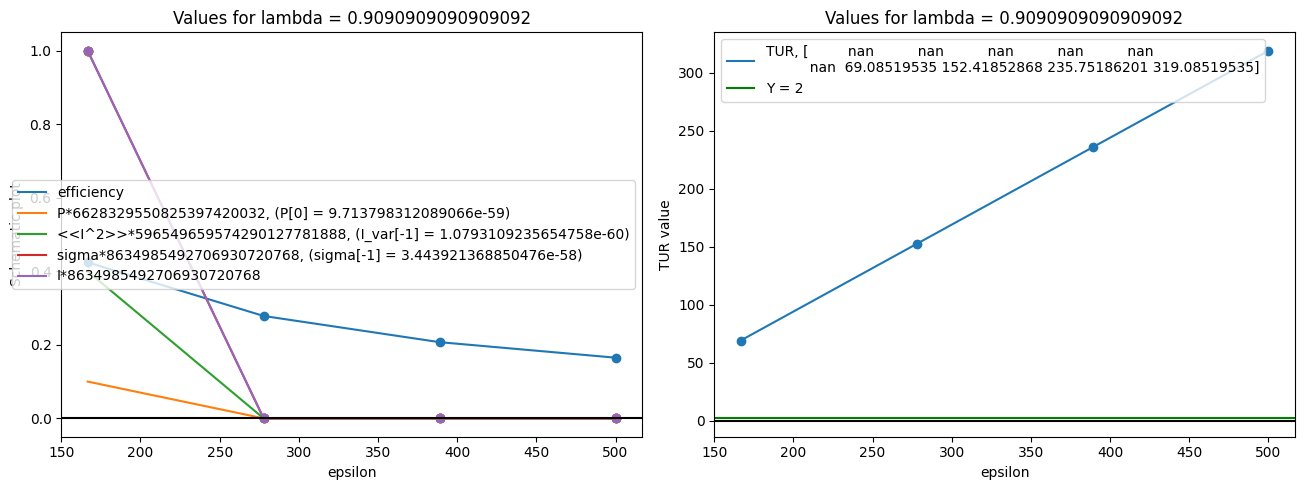

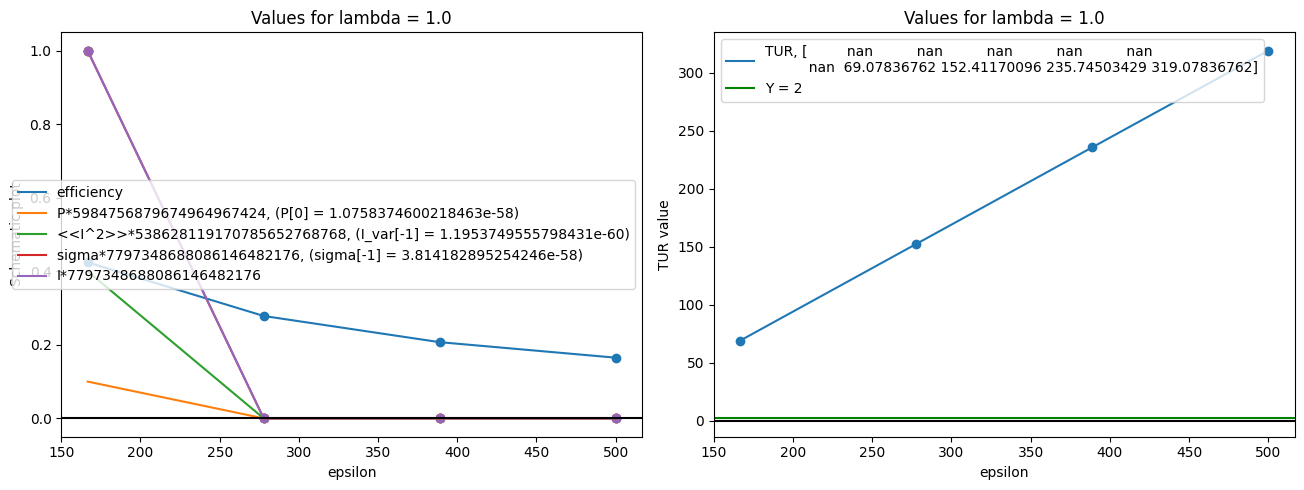

In [7]:
#---------plotting----------------------------------
for idx, lmda in enumerate(lamdas):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5)) 

    def get_mult(matrix):
        max = 0
        for e_idx, _ in enumerate(epsilons):
            if matrix[idx, e_idx] > max:
                max = matrix[idx, e_idx]
        return 1/max 


    ax1.plot(epsilons, eff[idx], label='efficiency')
    ax1.scatter(epsilons, eff[idx])
    ax1.plot(epsilons, 0.1*get_mult(P)*P[idx], label=f'P*{round(get_mult(P))}, (P[0] = {P[idx][-1]})')
    ax1.scatter(epsilons, get_mult(P)*P[idx])
    ax1.plot(epsilons, 0.4*get_mult(I_var)*I_var[idx], label=f'<<I^2>>*{round(get_mult(I_var))}, (I_var[-1] = {I_var[idx][-1]})')
    ax1.scatter(epsilons, get_mult(I_var)*I_var[idx])
    ax1.plot(epsilons, get_mult(sigma)*sigma[idx], label=f'sigma*{round(get_mult(sigma))}, (sigma[-1] = {sigma[idx][-1]})')
    ax1.scatter(epsilons, get_mult(sigma)*sigma[idx])
    ax1.plot(epsilons, get_mult(I)*I[idx], label=f'I*{round(get_mult(sigma))}')
    ax1.scatter(epsilons, get_mult(I)*I[idx])
    
    #ax1.scatter(epsilons, J_QH[idx], label=f'J_QH, 0: {J_QH[idx][0]}, 1: {J_QH[idx][1]}, 2: {J_QH[idx][2]} , 3: {J_QH[idx][3]}, 4: {J_QH[idx][4]}, 5: {J_QH[idx][5]}, 6: {J_QH[idx][6]}')
    ax1.axhline(y=0, color='black', linestyle='-')
    #ax1.set_ylim(-0.01, 0.01)
    ax1.set_xlabel('epsilon')
    ax1.set_ylabel('Schematic plot')
    ax1.set_title(f'Values for lambda = {lmda}')
    ax1.legend()

    ax2.plot(epsilons, TUR[idx], label=f'TUR, {TUR[idx]}')
    ax2.scatter(epsilons, TUR[idx])
    ax2.set_title(f'Values for lambda = {lmda}')
    ax2.axhline(y=2, color='g', linestyle='-', label= 'Y = 2')
    ax2.axhline(y=0, color='black', linestyle='-')
    ax2.set_xlabel('epsilon')
    ax2.set_ylabel('TUR value')
    ax2.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

I: (12, 10)
meshgrid:
epsilon: (12, 10)
lamda: (12, 10)


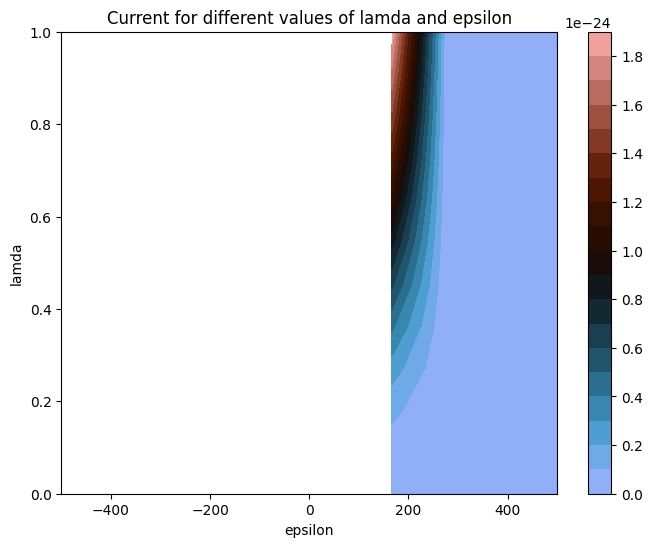

In [8]:
# Plotting of the cummulants

# Create a mesh grid
epsilon, lamda = np.meshgrid(epsilons, lamdas)
print('I:',I.shape)
print('meshgrid:')
print('epsilon:', epsilon.shape)
print('lamda:', lamda.shape)

plt.figure(figsize=(8, 6))
# Create a contour plot (or a pcolormesh plot for a smooth color gradient)
contour = plt.contourf(epsilon, lamda, I, 20, cmap='berlin')  # Adjust number of contour levels as needed
#contour = plt.pcolormesh(epsilon, lamda, I, shading='auto', cmap='viridis')
plt.colorbar(contour)
plt.xlabel('epsilon')
plt.ylabel('lamda')
plt.title('Current for different values of lamda and epsilon')
plt.show()